In [1]:
import pandas as pd
import numpy as np
import os, sys
from response import response, response_legacy
import matplotlib.pyplot as plt
import sklearn

------------

### Comparison between simulation (response function using fit parameters : k3, k4, k5, k6) and the ideal response

In [2]:
simdata_df = pd.read_csv('simulation_data.csv')
simdata_df.head()

,k3,k4,k5,k6,class
0,-0.452744,-0.582004,-0.582004,-0.452744,Overshoot
1,-0.250516,0.686300,-0.039354,0.135301,Undershoot
2,-0.399387,0.708746,0.498897,0.708746,Singularity
3,0.149704,0.149704,0.032483,0.032483,Ideal
4,-0.033138,0.504122,0.040915,0.220249,Undershoot


**Integral of the response function**

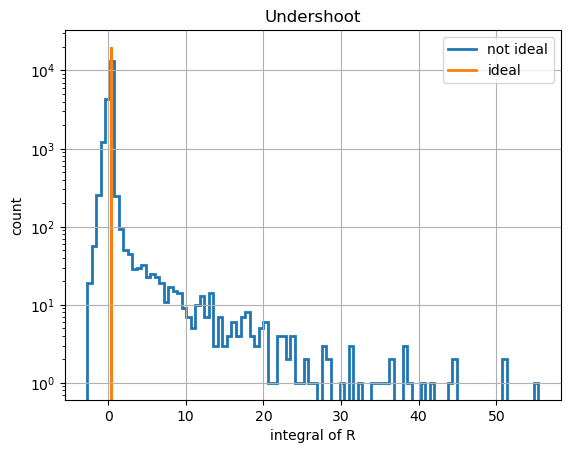

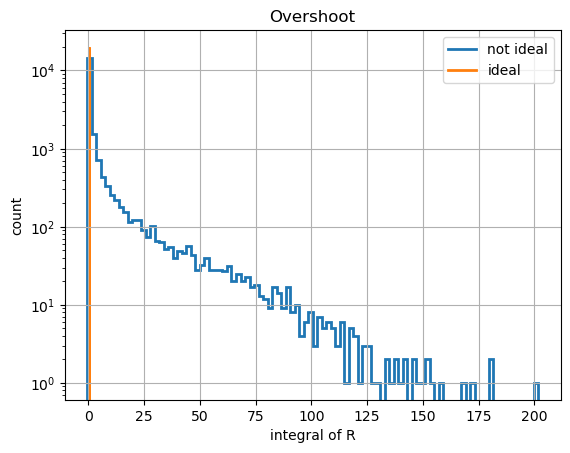

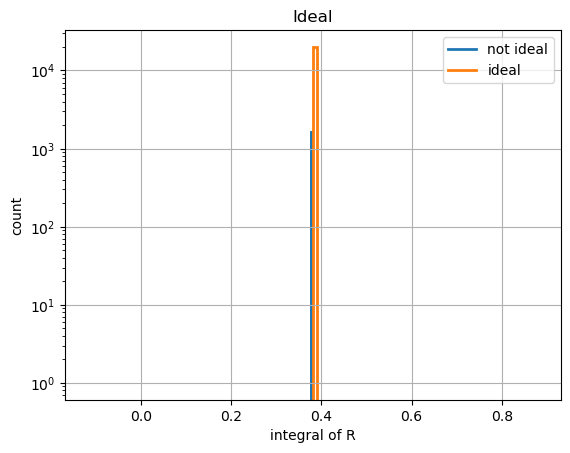

/media/rado/RADO/WORKSPACE/CE_Project/response.py:28: RuntimeWarning: overflow encountered in exp
  value = A*((-(k3*k4) + pow(k4,2) + k3*k5 - k4*k5)/(np.exp(k4*t)*(k4 - k6)*(k4 - p0)*(pow(k4,2) + pow(pi1,2) - 2*k4*pr1 + pow(pr1,2))*(pow(k4,2) + pow(pi2,2) - 2*k4*pr2 + pow(pr2,2))) +
/media/rado/RADO/WORKSPACE/CE_Project/response.py:29: RuntimeWarning: overflow encountered in exp
  (-(k3*k5) + k3*k6 + k5*k6 - pow(k6,2))/(np.exp(k6*t)*(k4 - k6)*(k6 - p0)*(pow(k6,2) + pow(pi1,2) - 2*k6*pr1 + pow(pr1,2))*(pow(k6,2) + pow(pi2,2) - 2*k6*pr2 + pow(pr2,2))) +
/media/rado/RADO/WORKSPACE/CE_Project/response.py:28: RuntimeWarning: overflow encountered in multiply
  value = A*((-(k3*k4) + pow(k4,2) + k3*k5 - k4*k5)/(np.exp(k4*t)*(k4 - k6)*(k4 - p0)*(pow(k4,2) + pow(pi1,2) - 2*k4*pr1 + pow(pr1,2))*(pow(k4,2) + pow(pi2,2) - 2*k4*pr2 + pow(pr2,2))) +
/media/rado/RADO/WORKSPACE/CE_Project/response.py:29: RuntimeWarning: overflow encountered in multiply
  (-(k3*k5) + k3*k6 + k5*k6 - pow(k6,2))/(np.exp

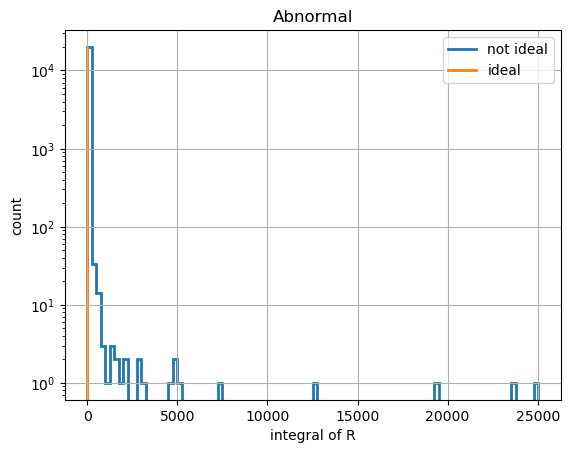

In [70]:
from scipy import integrate
A = 1.5
# A = 64050.18259
t0 = -0.1
tp = 2.0
x = np.linspace(t0, t0+10, np.power(10, 2))
classes = ['Undershoot', 'Overshoot', 'Ideal', 'Abnormal']
for CLASS in classes:
    overshoot_df = simdata_df[simdata_df['class']==CLASS]
    overshoot_df_copy = overshoot_df.copy().reset_index().drop('index', axis=1).iloc[:20000]
    integral_R_all = []
    integral_R_ideal_all = []
    integral_R_diff = []
    j = 1
    for i in range(len(overshoot_df_copy)):
        lineParam = overshoot_df_copy.iloc[i]
        par = [t0, A, tp, lineParam['k3'], lineParam['k4'], lineParam['k5'], lineParam['k6']]
        R = response(x=x, par=par)
        par_ideal = [par[0], par[1], par[2]]
        R_ideal = response_legacy(x=x, par=par_ideal)
        
        integral_R = integrate.simpson(y=R, x=x)
        integral_R_ideal = integrate.simpson(y=R_ideal, x=x)
        # if j==1 and (integral_R_ideal-integral_R)>0 and CLASS=='Undershoot':
        #     plt.figure()
        #     plt.plot(x, R, label='response function (not ideal)')
        #     plt.plot(x, R_ideal, label='ideal response')
        #     plt.xlabel('x')
        #     plt.title(CLASS)
        #     plt.legend()
        #     plt.grid(True)
        #     plt.show()
        #     j+=1
        if j==2 and (integral_R_ideal-integral_R)<0 and CLASS=='Overshoot':
            plt.figure()
            plt.plot(x, R, label='response function (not ideal)')
            plt.plot(x, R_ideal, label='ideal response')
            plt.xlabel('x')
            plt.title(CLASS)
            plt.legend()
            plt.grid(True)
            plt.show()
            j+=1

        # print(integral_R, integral_R_ideal)
        integral_R_all.append(integral_R)
        integral_R_ideal_all.append(integral_R_ideal)

    integral_R_diff = np.array(integral_R_ideal_all) - np.array(integral_R_all)
    overshoot_df_copy['integral_R'] = integral_R_all
    overshoot_df_copy['integral_ideal'] = integral_R_ideal_all
    overshoot_df_copy['diff_integral'] = integral_R_diff
    # print(overshoot_df_copy.head())
    # break
    plt.figure()
    counts_R, bins_R = np.histogram(integral_R_all, bins=100)
    counts_ideal, bins_ideal = np.histogram(integral_R_ideal_all, bins=100)
    # counts_diff, bins_diff = np.histogram(integral_R_diff, bins=100)
    # plt.hist(integral_R_ideal_all, alpha=0.8, label='ideal')
    # plt.hist(integral_R_all, alpha=0.2, label='not ideal')
    plt.stairs(counts_R, bins_R, label='not ideal', linewidth=2.0)
    plt.stairs(counts_ideal, bins_ideal, label='ideal', linewidth=2.0)
    # plt.stairs(counts_diff, bins_diff, label='difference : R_ideal - R', linewidth=2.0)
    plt.xlabel('integral of R')
    plt.ylabel('count')
    plt.yscale('log')
    plt.title(CLASS)
    plt.legend()
    plt.grid(True)
    plt.show()

**Position of the peak**

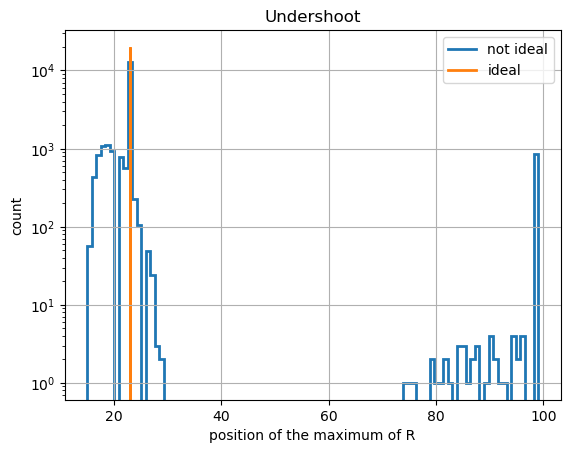

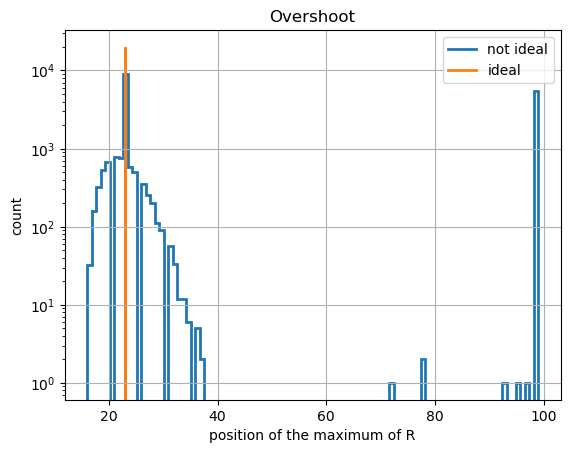

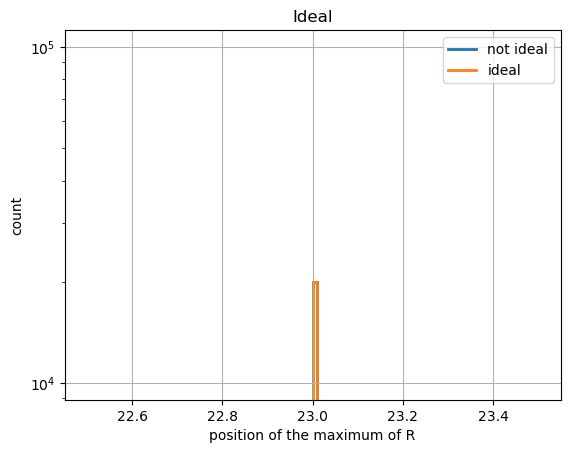

/media/rado/RADO/WORKSPACE/CE_Project/response.py:28: RuntimeWarning: overflow encountered in exp
  value = A*((-(k3*k4) + pow(k4,2) + k3*k5 - k4*k5)/(np.exp(k4*t)*(k4 - k6)*(k4 - p0)*(pow(k4,2) + pow(pi1,2) - 2*k4*pr1 + pow(pr1,2))*(pow(k4,2) + pow(pi2,2) - 2*k4*pr2 + pow(pr2,2))) +
/media/rado/RADO/WORKSPACE/CE_Project/response.py:29: RuntimeWarning: overflow encountered in exp
  (-(k3*k5) + k3*k6 + k5*k6 - pow(k6,2))/(np.exp(k6*t)*(k4 - k6)*(k6 - p0)*(pow(k6,2) + pow(pi1,2) - 2*k6*pr1 + pow(pr1,2))*(pow(k6,2) + pow(pi2,2) - 2*k6*pr2 + pow(pr2,2))) +
/media/rado/RADO/WORKSPACE/CE_Project/response.py:28: RuntimeWarning: overflow encountered in multiply
  value = A*((-(k3*k4) + pow(k4,2) + k3*k5 - k4*k5)/(np.exp(k4*t)*(k4 - k6)*(k4 - p0)*(pow(k4,2) + pow(pi1,2) - 2*k4*pr1 + pow(pr1,2))*(pow(k4,2) + pow(pi2,2) - 2*k4*pr2 + pow(pr2,2))) +
/media/rado/RADO/WORKSPACE/CE_Project/response.py:29: RuntimeWarning: overflow encountered in multiply
  (-(k3*k5) + k3*k6 + k5*k6 - pow(k6,2))/(np.exp

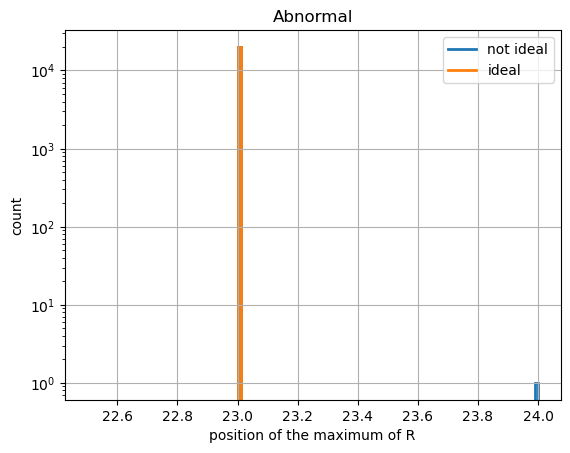

In [74]:
A = 1.5
# A = 64050.18259
t0 = -0.1
tp = 2.0
x = np.linspace(t0, t0+10, np.power(10, 2))
classes = ['Undershoot', 'Overshoot', 'Ideal', 'Abnormal']
for CLASS in classes:
    overshoot_df = simdata_df[simdata_df['class']==CLASS]
    overshoot_df_copy = overshoot_df.copy().reset_index().drop('index', axis=1).iloc[:20000]
    pos_max_reals = []
    pos_max_ideals = []
    j = 1
    for i in range(len(overshoot_df_copy)):
        lineParam = overshoot_df_copy.iloc[i]
        par = [t0, A, tp, lineParam['k3'], lineParam['k4'], lineParam['k5'], lineParam['k6']]
        R = response(x=x, par=par)
        par_ideal = [par[0], par[1], par[2]]
        R_ideal = response_legacy(x=x, par=par_ideal)
        
        tt = np.where(R==np.max(R))[0][0]
        pos_max_reals.append(tt)
        tt = np.where(R_ideal==np.max(R_ideal))[0][0]
        pos_max_ideals.append(tt)

    plt.figure()
    counts_R, bins_R = np.histogram(pos_max_reals, bins=100)
    counts_ideal, bins_ideal = np.histogram(pos_max_ideals, bins=100)
    plt.stairs(counts_R, bins_R, label='not ideal', linewidth=2.0)
    plt.stairs(counts_ideal, bins_ideal, label='ideal', linewidth=2.0)
    # plt.stairs(counts_diff, bins_diff, label='difference : R_ideal - R', linewidth=2.0)
    plt.xlabel('position of the maximum of R')
    plt.ylabel('count')
    plt.yscale('log')
    plt.title(CLASS)
    plt.legend()
    plt.grid(True)
    plt.show()

----------------------------
### Comparison between data (response function using the fit parameters) and ideal response

In [49]:
from scipy import integrate
data_df = pd.read_csv('data/two_data.csv')
data_df.head()

,#Ch. #,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF,Overshoot,Undershoot,Ideal,Singularity
0,0,5.168380,0.016480,63551.21586,457.255779,2.005194,0.011204,0.084885,0.016731,0.083182,0.007405,0.084845,0.017068,0.083149,0.007296,8.314216,True,False,False,False
1,1,5.125260,0.016402,64050.18259,453.216645,1.982492,0.010483,0.076184,0.002083,0.082611,0.002288,-0.168491,0.000001,-0.168490,0.000001,6.624724,False,True,False,False
2,2,5.126215,0.016700,63789.33173,450.512634,2.051578,0.011507,0.128736,0.002802,0.144325,0.002418,0.128579,0.002794,0.115445,0.001615,3.475155,False,True,False,False
3,3,5.126688,0.017194,63692.52284,455.249167,1.971281,0.011576,0.093918,0.037538,0.136646,0.003721,0.093917,0.037537,0.058203,0.001226,5.964010,False,True,False,False
4,4,5.055860,0.022534,74734.46744,16428.503940,2.233869,0.024320,0.972904,0.066550,1.267541,0.075325,0.026909,0.004198,0.025164,0.004034,2.673853,False,True,False,False


In [3]:
 
for CLASS in ['Undershoot', 'Overshoot', 'Ideal']:
    R_int_all = []
    R_ideal_all = []
    tmp_df = data_df[data_df[CLASS]==True].copy().reset_index().drop('index', axis=1)
    # tmp_df = data_df.copy()
    pos_max_Ideal = []
    pos_max_real = []
    showResponse = True
    for i in range(len(tmp_df)):
        lineParam = tmp_df.iloc[i]
        par = [lineParam[' t '], lineParam[' A_0 '], lineParam[' t_p '], lineParam[' k3 '], lineParam[' k4 '], lineParam[' k5 '], lineParam[' k6 ']]
        x = np.linspace(lineParam[' t '], lineParam[' t ']+10,  np.power(100, 2))
        R = response(x=x, par=par)
        R_ideal = response_legacy(x=x, par=par)
        xx = np.where(R<0)[0]
        if showResponse and len(xx)!=0:
            figg, axx = plt.subplots(1,2,figsize=(5*2,5))
            print(x)
            print('index = ', i, '\t class = ', CLASS)

            axx[0].plot(x, R, label='real response')
            axx[0].plot(x, R_ideal, label='ideal')
            axx[0].set_xlabel('t')
            axx[0].set_title(CLASS)
            axx[0].legend()
            axx[0].grid(visible=True, which='both')

            # plt.figure()
            axx[1].plot(x[xx], R[xx])
            axx[1].set_xlabel('t')
            ax[1].set_title(CLASS)
            # plt.show()
            # plt.show()
            showResponse = False

        tt = np.where(R==np.max(R))[0][0]
        pos_max_real.append(x[tt])
        tt = np.where(R_ideal==np.max(R_ideal))[0][0]
        pos_max_Ideal.append(x[tt])
        tmp_int_R = integrate.simpson(y=R, x=x)
        tmp_int_ideal = integrate.simpson(y=R_ideal, x=x)
        if np.abs(tmp_int_R) != np.inf:
            R_int_all.append(tmp_int_R)
        # if np.abs(tmp_int_ideal) != np.inf:
            R_ideal_all.append(tmp_int_ideal)
    counts_R, bins_R = np.histogram(R_int_all, bins=100)
    counts_R_ideal, bins_R_ideal = np.histogram(R_ideal_all, bins=100)
    ##
    ## MAKING PLOTS
    # diff = np.array(R_ideal_all) - np.array(R_int_all)
    # count_diff, bins_diff = np.histogram(diff, bins=100)
    fig, ax = plt.subplots(1,2,figsize=(5*2, 5))
    ax[0].stairs(counts_R, bins_R, label='not ideal : R')
    ax[0].stairs(counts_R_ideal, bins_R_ideal, label='ideal')
    # ax[0].stairs(count_diff, bins_diff, label='difference : integral_R_ideal - integral_R')
    # ax[0].yscale('log')
    # ax[0].xscale('log')
    ax[0].set_xlabel('integral of the response')
    ax[0].set_title(CLASS)
    ax[0].legend()
    # plt.show()
    ## 
    ## position of the peak
    counts_R, bins_R = np.histogram(pos_max_real, bins=100)
    counts_R_ideal, bins_R_ideal = np.histogram(np.array(pos_max_Ideal), bins=100)
    # plt.figure()
    ax[1].stairs(counts_R, bins_R, label='not ideal : R')
    ax[1].stairs(counts_R_ideal, bins_R_ideal, label='ideal')
    # ax[1].yscale('log')
    # ax[1].xscale('log')

    ax[1].set_xlabel('pospeak of the response')
    ax[1].set_title(CLASS)
    ax[1].legend()
    plt.tight_layout()
    plt.show()

NameError: name 'data_df' is not defined

---------------------------
### Analysis of the parameters of the fit using the data

In [2]:
data = pd.read_csv('data/run_30413/fit_results_run_30413_no_avg.txt', sep='\t')
# data = pd.read_csv('data/two_data.csv')
# data = pd.read_csv('data/two_data.csv')
data.columns = data.columns.str.strip().str.replace(' ', '')
data.head()

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF
0,5.008733,0.009035,83064.54115,631.653,2.250056,0.012383,0.431505,0.043863,0.690926,0.019752,0.431485,0.043861,0.322236,0.005990,10.837975,NaN
1,5.014668,0.008637,88813.00258,1574.470,2.185990,0.010328,0.958992,0.017475,1.248665,0.024367,0.065162,0.003971,0.066870,0.004085,11.788794,NaN
2,5.028058,0.008975,82152.01742,665.526,2.212939,0.012120,0.475459,0.115498,0.700305,0.027182,0.475393,0.115472,0.377476,0.011649,7.817971,NaN
3,5.050278,0.008644,77046.19645,449.523,2.043111,0.007093,0.161044,0.002370,0.253107,0.004593,0.161035,0.002370,0.099146,0.001443,6.091413,NaN
4,5.020794,0.008312,88855.94059,7188.340,2.269399,0.010159,0.900172,0.015525,1.179171,0.026359,0.065855,0.005066,0.063880,0.004908,7.904888,NaN


In [3]:
# shift data columns to the right
columns = data.columns
data = data.reset_index()
data.drop(columns[-1], axis=1, inplace=True)
data.columns = columns

In [8]:
k_params = ['k3', 'k4', 'k5', 'k6']
def plot2d(df, param1='k3', param2='k4'):
    # plt.figure()
    fig, ax = plt.subplots(1,3,figsize=(5*3,5))
    c, b = np.histogram(df[param1], bins=100)
    # ax[0].hist(df[param1])
    param1_mean = np.mean(df[param1])
    param1_std = np.std(df[param1])
    print(param1, param1_mean, param1_std)
    ax[0].stairs(c, b, linewidth=2.0)
    ax[0].set_yscale('log')
    ax[0].set_xlabel(param1)

    param2_mean = np.mean(df[param2])
    param2_std = np.std(df[param2])
    c2 , b2 = np.histogram(df[param2], bins=100)
    print(param2, param2_mean, 3*param2_std)
    ax[1].stairs(c2, b2, linewidth=2.0)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(param2)


    # ax[2].scatter(df[df[param2]>100][param1], df[df[param2]>100][param2])
    ax[2].scatter(df[param1], df[param2])
    ax[2].set_xlabel(param1)
    ax[2].set_ylabel(param2)
    # ax[2].set_yscale('log')
    plt.tight_layout()
    plt.show()

In [5]:
# for k_param in k_params:
#     data[k_param+'_std'] = np.std(data[k_param])

In [5]:
data.iloc[:6]

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF
0,0,5.008733,0.009035,83064.54115,631.653,2.250056,0.012383,0.431505,0.043863,0.690926,0.019752,0.431485,0.043861,0.322236,0.005990,10.837975
1,1,5.014668,0.008637,88813.00258,1574.470,2.185990,0.010328,0.958992,0.017475,1.248665,0.024367,0.065162,0.003971,0.066870,0.004085,11.788794
2,2,5.028058,0.008975,82152.01742,665.526,2.212939,0.012120,0.475459,0.115498,0.700305,0.027182,0.475393,0.115472,0.377476,0.011649,7.817971
3,3,5.050278,0.008644,77046.19645,449.523,2.043111,0.007093,0.161044,0.002370,0.253107,0.004593,0.161035,0.002370,0.099146,0.001443,6.091413
4,4,5.020794,0.008312,88855.94059,7188.340,2.269399,0.010159,0.900172,0.015525,1.179171,0.026359,0.065855,0.005066,0.063880,0.004908,7.904888
5,5,5.027961,0.008432,89118.75734,298.836,2.163617,0.009578,0.990102,0.015362,1.285738,0.022480,0.027013,0.010809,0.027301,0.010873,9.229203


In [6]:
nstd = 50
condition = (data['k3']>=-nstd*data['E(k3)'])&(data['k3']<=nstd*data['E(k3)']) & (data['k4']>=-nstd*data['E(k4)'])&(data['k4']<=nstd*data['E(k4)']) & (data['k5']>=-nstd*data['E(k5)'])&(data['k5']<=nstd*data['E(k5)']) & (data['k6']>=-nstd*data['E(k6)'])&(data['k6']<=nstd*data['E(k6)'])
# for k_param in k_params:
#     for k_param1 in k_params:
#         if k_param!=k_param1:
#             plot2d(df=data[condition], param1=k_param, param2=k_param1)

---------------
### Visualizing the waveform : data

In [7]:
data.columns

Index(['#Ch.#', 't', 'E(t)', 'A_0', 'E(A_0)', 't_p', 'E(t_p)', 'k3', 'E(k3)',
       'k4', 'E(k4)', 'k5', 'E(k5)', 'k6', 'E(k6)', 'Chi2/DOF'],
      dtype='object')

In [10]:
tmp_df = data[condition][['t', 'A_0', 't_p', 'k3', 'k4', 'k5', 'k6']].copy().reset_index().drop('index', axis=1)
# tmp_df = data[['t', 'A_0', 't_p', 'k3', 'k4', 'k5', 'k6']].copy().reset_index().drop('index', axis=1)
# tmp_df = data.copy()
x = np.linspace(tmp_df['t'].iloc[2152], tmp_df['t'].iloc[2152]+70, 70)
par0 = list(tmp_df.iloc[2152])
# par0 = [5, 7000, 2.0, tmp_df.iloc[0]['k3'], tmp_df.iloc[0]['k4'], tmp_df.iloc[0]['k5'], tmp_df.iloc[0]['k6']]

In [11]:
tmp_df

,t,A_0,t_p,k3,k4,k5,k6
0,5.028058,82152.01742,2.212939,0.475459,0.700305,0.475393,0.377476
1,5.005071,82479.90051,2.254202,0.444122,0.678653,0.444087,0.344753
2,5.040750,88556.38748,2.184355,1.020078,1.307345,0.022602,0.025840
3,5.048302,88978.52446,2.194005,1.262820,1.569498,0.033323,0.039745
4,5.035189,88787.45122,2.182900,1.068882,1.360963,0.047138,0.052300
...,...,...,...,...,...,...,...
6135,5.105504,75059.88015,2.103103,0.029225,0.016374,0.008011,0.016458
6136,5.041171,78695.14070,2.074962,0.637336,0.697428,0.092359,0.086531
6137,5.091368,74701.18809,2.152389,0.072689,0.075013,0.072704,0.075030
6138,5.095215,75296.92869,2.137279,0.161297,0.134389,0.108728,0.134402


In [12]:
R = response(x=x, par=par0)
R_ideal = response_legacy(x=x, par=par0)


<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_5507/600557019.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Ticks (0.512$\mu$s/Tick)')


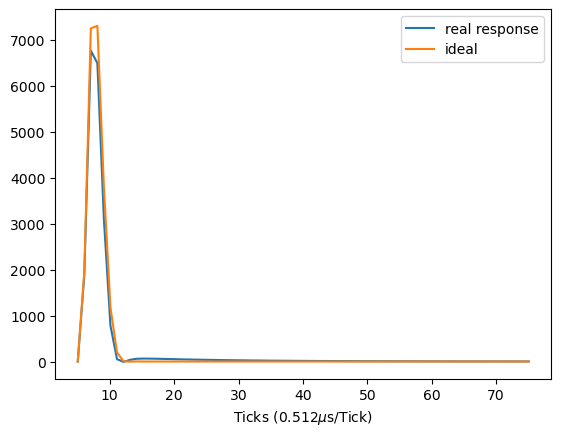

In [13]:

plt.figure()
plt.plot(x, R, label='real response')
plt.plot(x, R_ideal, label='ideal')
plt.xlabel('Ticks (0.512$\mu$s/Tick)')
plt.legend()
plt.show()

**PLAN**:
* Analyze/Classify the different types of tails a waveform can have
* From these classes, find their correlation with other parameters like the amplitude, the position of the peak, the peak time, etc...

In [14]:
pos_peak = np.argmax(R)
# considering the peak time is 2us and each tick corresponds to 0.512 us, there are at most 5 ticks from the peak to the pedestal.
xtail = x[pos_peak+5:]

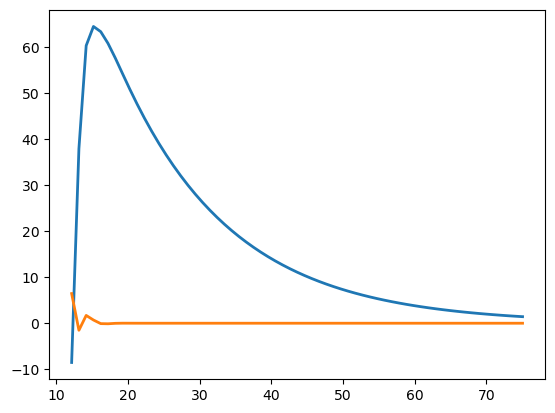

In [15]:
plt.figure()
plt.plot(x[pos_peak+5:], R[pos_peak+5:], linewidth=2)
plt.plot(xtail, R_ideal[pos_peak+5:], linewidth=2)
plt.show()

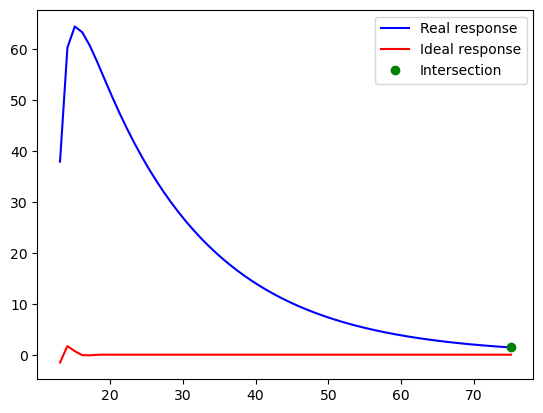

In [16]:
from scipy import interpolate
import matplotlib.pyplot as plt

def find_intersection(x1, y1, x2, y2):
    """
    Find intersection of two curves using interpolation
    
    Parameters:
    x1, y1: coordinates of first curve
    x2, y2: coordinates of second curve
    
    Returns:
    x, y: coordinates of intersection point
    """
    # Create interpolation functions for both curves
    f1 = interpolate.interp1d(x1, y1)
    f2 = interpolate.interp1d(x2, y2)
    
    # Find the overlapping x-range
    x_min = max(x1.min(), x2.min())
    x_max = min(x1.max(), x2.max())
    
    # Create array of x-values to search for intersection
    x = np.linspace(x_min, x_max, 10000)
    
    # Calculate y-values for both functions
    y1_interp = f1(x)
    y2_interp = f2(x)
    
    # # Find where the difference is closest to zero
    idx = np.argmin(np.abs(y1_interp - y2_interp))
   
    return x[idx], y1_interp[idx]

# Example usage:
# x1 = np.array([...])  # Your first x array
# y1 = np.array([...])  # Your first y array
# x2 = np.array([...])  # Your second x array
# y2 = np.array([...])  # Your second y array
x1 = x[pos_peak+6:]
y1 = R[pos_peak+6:]
x2 = x[pos_peak+6:]
y2 = R_ideal[pos_peak+6:]

# Find intersection
# x_intersect, y_intersect = find_intersection(x1, y1, x2, y2)
x_intersect, y_intersect = find_intersection(x1,y1,x2, y2)
# mask = x1 <= x_intersect
mask = x1==x1
# Plot the results
plt.plot(x1[mask], y1[mask], 'b-', label='Real response')
plt.plot(x2[mask], y2[mask], 'r-', label='Ideal response')
plt.plot(x_intersect, y_intersect, 'go', label='Intersection')
# plt.plot(x,R)
plt.legend()
plt.show()

In [17]:
from scipy import integrate

def local_average_convolve(arr, window_size=3):
    # create weights for averaging
    weights = np.ones(window_size) / window_size
    # calculate moving average
    avg = np.convolve(arr, weights, mode='valid')
    return avg

integrals_R_selected = []
integrals_R_ideal_selected = []
max_deviations = []
for i in range(len(tmp_df)):
    x = np.linspace(tmp_df['t'].iloc[i], tmp_df['t'].iloc[i]+70, 70)
    par0 = list(tmp_df.iloc[i])
    # try:
    # calculate the response
    R = response(x=x, par=par0)
    R_ideal = response_legacy(x=x, par=par0)
    # find peak in ideal response
    pos_peak = np.argmax(R_ideal)
    # considering the peak time is 2us and each tick corresponds to 0.512 us, there are at most 5 ticks from the peak to the pedestal.
    xtail = x[pos_peak+6:]
    # find intersection
    x1 = x[pos_peak+6:]
    y1 = R[pos_peak+6:]
    x2 = x[pos_peak+6:]
    y2 = R_ideal[pos_peak+6:]
    x_intersect, y_intersect = find_intersection(x1,y1,x2, y2)
    # select data between pos_peak+6 and x_intersect
    # mask = (x <= x_intersect) and (x >= x[pos_peak+6])
    mask = x1 <= x_intersect
    x_selected = x1[mask]
    R_selected = y1[mask]
    R_ideal_selected = y2[mask]
    integral_R_selected = integrate.simpson(x=x_selected, y=R_selected)
    integral_R_ideal_selected = integrate.simpson(x=x_selected, y=R_ideal_selected)
    integrals_R_selected.append(integral_R_selected)
    integrals_R_ideal_selected.append(integral_R_ideal_selected)
    #
    # Deviation between the ideal and real responses:
    R_avg = local_average_convolve(R, 2)
    x_avg = local_average_convolve(x, 2)
    R_ideal_avg = local_average_convolve(R_ideal, 2)
    deviations = np.abs(R_avg - R_ideal_avg)
    max_deviation = np.max(deviations)
    max_deviations.append(max_deviation)
max_deviations = np.array(max_deviations) / np.max(max_deviations)


/media/rado/RADO/WORKSPACE/CE_Project/response.py:29: RuntimeWarning: overflow encountered in exp
  (-(k3*k5) + k3*k6 + k5*k6 - pow(k6,2))/(np.exp(k6*t)*(k4 - k6)*(k6 - p0)*(pow(k6,2) + pow(pi1,2) - 2*k6*pr1 + pow(pr1,2))*(pow(k6,2) + pow(pi2,2) - 2*k6*pr2 + pow(pr2,2))) +


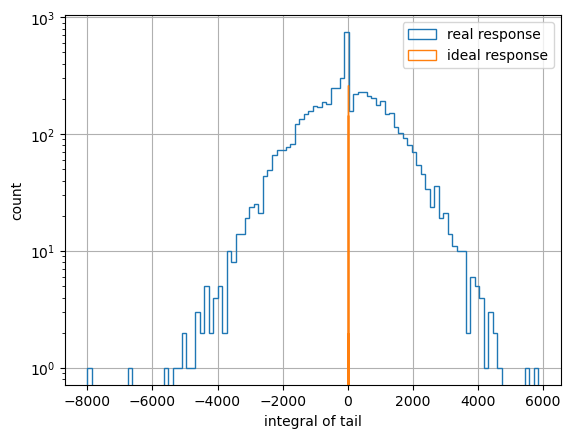

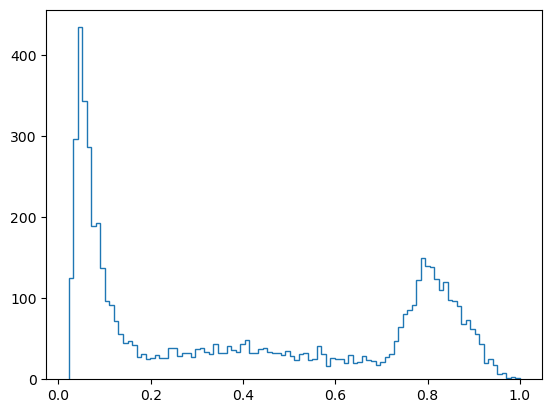

In [18]:
plt.figure()
plt.hist(integrals_R_selected, bins=100, histtype='step', label='real response')
plt.hist(integrals_R_ideal_selected, bins=100, histtype='step', label='ideal response')
plt.xlabel('integral of tail')
plt.ylabel('count')
plt.yscale('log')
# plt.xlim([-2, 10])
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.hist(max_deviations, bins=100, histtype='step')
plt.show()



In [18]:
len(tmp_df), len(integrals_R_selected)

(6140, 6140)

In [19]:
tmp_df['integral_R'] = integrals_R_selected
tmp_df['integral_ideal'] = integrals_R_ideal_selected
tmp_df['max_deviation'] = max_deviations

#### Classification based on the integral of the tail

In [31]:
ideal_df = tmp_df[tmp_df['integral_R']==tmp_df['integral_ideal']].copy().reset_index().drop('index', axis=1)
# ideal_df = tmp_df[(tmp_df['integral_R']==tmp_df['integral_ideal']) & (tmp_df['max_deviation']<300)].copy().reset_index().drop('index', axis=1)
undershoot_df = tmp_df[tmp_df['integral_R']<tmp_df['integral_ideal']].copy().reset_index().drop('index', axis=1)
overshoot_df = tmp_df[tmp_df['integral_R']>tmp_df['integral_ideal']].copy().reset_index().drop('index', axis=1)

In [32]:
def plot_response(x, par, title):
    R = response(x=x, par=par)
    R_ideal = response_legacy(x=x, par=par)

    plt.figure()
    plt.plot(x, R, label='real response')
    plt.plot(x, R_ideal, label='ideal')
    plt.xlabel('Ticks (0.512$\mu$s/Tick)')
    plt.title(title)
    plt.legend()
    plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_4863/425672367.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Ticks (0.512$\mu$s/Tick)')


In [33]:
ideal_df

,t,A_0,t_p,k3,k4,k5,k6,integral_R,integral_ideal,max_deviation
0,5.026208,77397.44901,2.120217,0.461558,0.541846,0.084142,0.075697,0.0,0.0,0.359610
1,5.020406,78109.25518,2.138809,0.561821,0.662031,0.051719,0.045847,0.0,0.0,0.427803
2,5.032076,77888.92272,2.094083,0.441545,0.512535,0.062798,0.054859,0.0,0.0,0.326275
3,5.035825,79029.88703,2.125513,0.491507,0.566600,0.107775,0.101695,0.0,0.0,0.352626
4,5.047859,76720.65087,2.131137,0.553060,0.624168,0.055746,0.052583,0.0,0.0,0.326069
...,...,...,...,...,...,...,...,...,...,...
141,5.094884,74563.15445,2.113065,0.121094,0.110016,0.099481,0.109882,0.0,0.0,0.043384
142,5.055622,85659.63141,2.231120,1.433526,1.721317,-0.008184,-0.008230,0.0,0.0,0.709526
143,4.586874,77166.00922,2.240923,0.000040,0.000271,-0.061256,-0.061226,0.0,0.0,0.049057
144,5.057295,73026.61292,2.093035,0.385858,0.399469,0.025006,0.022470,0.0,0.0,0.083705


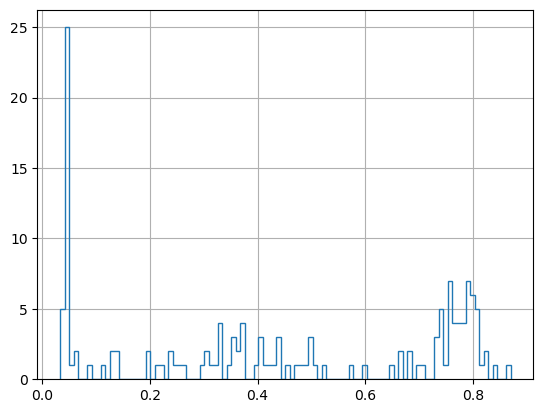

In [34]:
plt.figure()
ideal_df['max_deviation'].hist(bins=100, histtype='step')
plt.show()

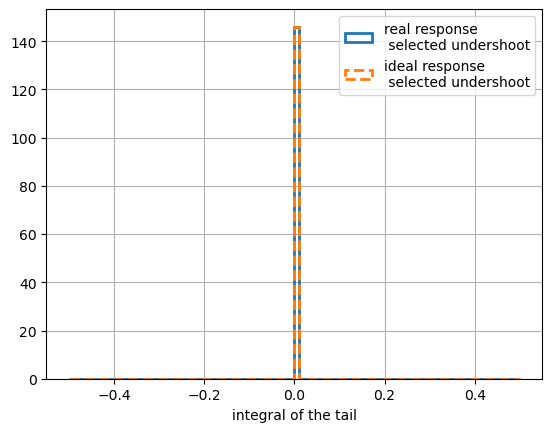

In [35]:
ideal_df['integral_R'].hist(bins=100, histtype='step', label='real response \n selected undershoot', linewidth=2)
plt.xlabel('integral of the tail')
# plt.legend()

ideal_df['integral_ideal'].hist(bins=100, histtype='step', label='ideal response \n selected undershoot', ls='--', linewidth=2)
plt.xlabel('integral of the tail')
# plt.xscale('log')
plt.legend()

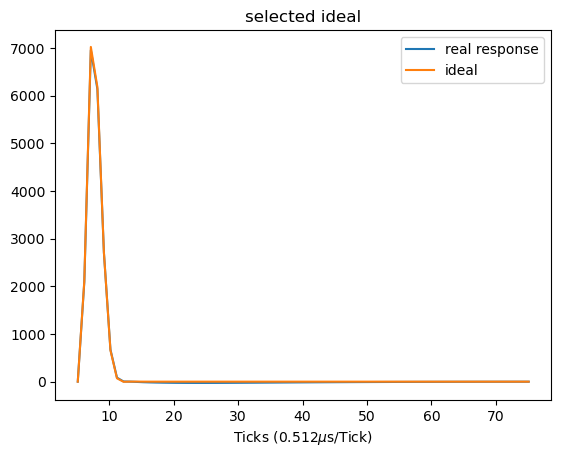

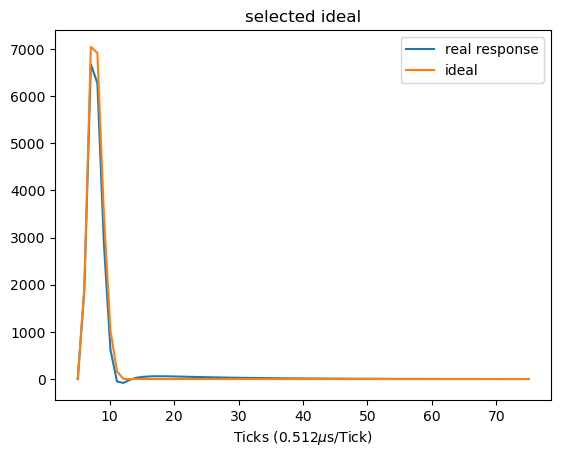

In [36]:
# WITHOUT CUT ON THE MAXIMUM DEVIATION
x = np.linspace(ideal_df['t'].iloc[12], ideal_df['t'].iloc[12]+70, 70)
par0 = list(ideal_df.iloc[12])
plot_response(x=x, par=par0, title='selected ideal')
# #
x = np.linspace(ideal_df['t'].iloc[0], ideal_df['t'].iloc[0]+70, 70)
par0 = list(ideal_df.iloc[0])
plot_response(x=x, par=par0, title='selected ideal')

# # SELECTING MAX DEVIATIONS < 0.2
# sel_ideal_df = ideal_df[ideal_df['max_deviation']<0.1].copy()
# print(len(sel_ideal_df), len(ideal_df))
# # x = np.linspace(sel_ideal_df['t'].iloc[12], sel_ideal_df['t'].iloc[12]+70, 70)
# # par0 = list(sel_ideal_df.iloc[12])
# # plot_response(x=x, par=par0, title='selected ideal')
# #
# x = np.linspace(sel_ideal_df['t'].iloc[0], sel_ideal_df['t'].iloc[0]+70, 70)
# par0 = list(sel_ideal_df.iloc[0])
# plot_response(x=x, par=par0, title='selected ideal')

In [26]:
undershoot_df

,t,A_0,t_p,k3,k4,k5,k6,integral_R,integral_ideal
0,5.040750,88556.38748,2.184355,1.020078,1.307345,0.022602,0.025840,-1595.153796,1.735842
1,5.048302,88978.52446,2.194005,1.262820,1.569498,0.033323,0.039745,-2251.796572,1.822815
2,5.035189,88787.45122,2.182900,1.068882,1.360963,0.047138,0.052300,-1293.441320,1.728409
3,5.028565,89313.33932,2.234647,0.975918,1.258734,0.050796,0.052906,-535.950303,2.139200
4,5.031267,86596.17160,2.170595,1.074504,1.372044,0.030116,0.033697,-1378.310654,1.585990
...,...,...,...,...,...,...,...,...,...
3223,5.068025,75219.53020,2.003969,0.092557,0.095988,0.092562,0.095978,-776.834932,1.667151
3224,5.036752,85349.48959,2.118217,1.263492,1.484675,0.165512,0.169706,-195.894669,2.210773
3225,5.091368,74701.18809,2.152389,0.072689,0.075013,0.072704,0.075030,-756.443293,1.238795
3226,5.095215,75296.92869,2.137279,0.161297,0.134389,0.108728,0.134402,-552.383845,1.919676


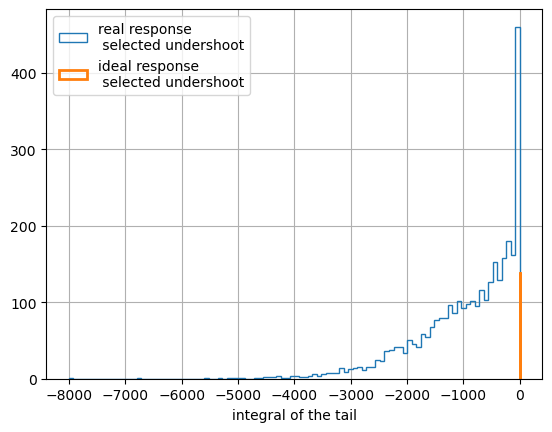

In [27]:

undershoot_df['integral_R'].hist(bins=100, histtype='step', label='real response \n selected undershoot')
plt.xlabel('integral of the tail')
# plt.legend()

undershoot_df['integral_ideal'].hist(bins=100, histtype='step', label='ideal response \n selected undershoot', linewidth=2)
plt.xlabel('integral of the tail')
# plt.xscale('log')
plt.legend()


In [28]:
len(undershoot_df['integral_ideal']) == len(undershoot_df['integral_R'])

True

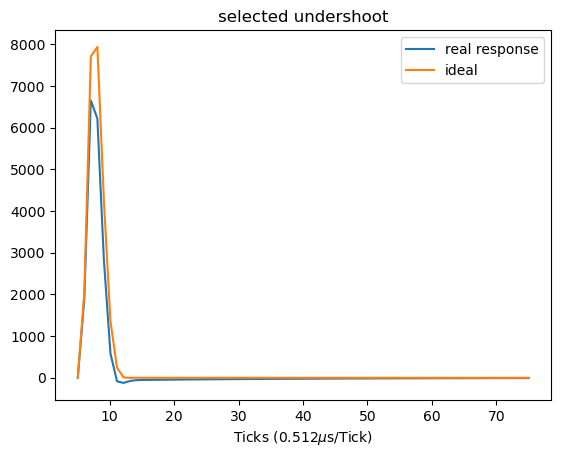

In [40]:
x = np.linspace(undershoot_df['t'].iloc[4], undershoot_df['t'].iloc[4]+70, 70)
par0 = list(undershoot_df.iloc[4])
plot_response(x=x, par=par0, title='selected undershoot')

In [30]:
overshoot_df

,t,A_0,t_p,k3,k4,k5,k6,integral_R,integral_ideal
0,5.028058,82152.01742,2.212939,0.475459,0.700305,0.475393,0.377476,98.548068,1.820606
1,5.005071,82479.90051,2.254202,0.444122,0.678653,0.444087,0.344753,141.152836,2.095709
2,5.028251,80190.58872,2.142035,0.519797,0.620157,0.083683,0.074206,1309.446390,1.250385
3,5.029097,78996.78905,2.170676,0.466014,0.543243,0.064113,0.057228,1356.756543,1.447413
4,5.037838,80158.22814,2.168284,0.485461,0.572150,0.093407,0.084030,1069.833625,1.450575
...,...,...,...,...,...,...,...,...,...
2761,5.091361,76385.12167,1.979175,0.049197,0.035414,0.026578,0.035421,807.422540,1.548042
2762,5.104848,73687.26229,2.095373,0.058495,0.027759,0.014693,0.027787,3605.438343,1.913742
2763,5.081329,83548.37431,2.195073,1.624984,1.869724,0.053812,0.053016,207.781507,1.719655
2764,5.105504,75059.88015,2.103103,0.029225,0.016374,0.008011,0.016458,1029.575895,1.951460


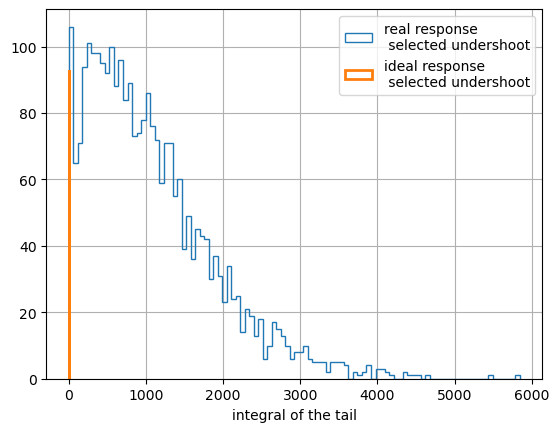

In [31]:
overshoot_df['integral_R'].hist(bins=100, histtype='step', label='real response \n selected undershoot')
plt.xlabel('integral of the tail')
# plt.legend()

overshoot_df['integral_ideal'].hist(bins=100, histtype='step', label='ideal response \n selected undershoot', linewidth=2)
plt.xlabel('integral of the tail')
# plt.xscale('log')
plt.legend()

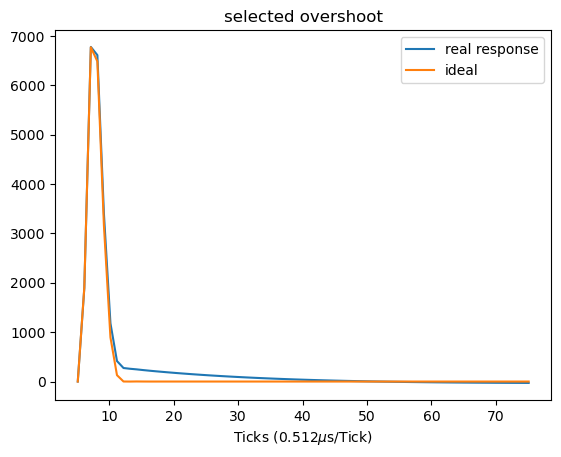

In [39]:
x = np.linspace(overshoot_df['t'].iloc[2762], overshoot_df['t'].iloc[2762]+70, 70)
par0 = list(overshoot_df.iloc[2762])
plot_response(x=x, par=par0, title='selected overshoot')

-------------------------
--------------------------
**It seems like the two fit results corresponding to the same run (30413) are quite different. Need to look at the difference between them.**


In [33]:
data_old = pd.read_csv('data/fit_results_run_30413_no_avg.txt', sep='\t') # old fit params 
data_new = pd.read_csv('data/run_30413/fit_results_run_30413_no_avg.txt', sep='\t') # new fit params
data_old.columns = data_old.columns.str.strip().str.replace(' ', '')
data_new.columns = data_new.columns.str.strip().str.replace(' ', '')

In [34]:
data_old

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF
0,0,5.168504,0.015292,76019.65987,502.926458,1.996457,0.010724,0.189659,0.016486,0.183282,1.593705e-02,0.054743,8.022267e-03,0.053374,0.007710,10.852992
1,1,5.201712,0.015230,76502.38864,502.662940,1.882698,0.010941,0.201669,0.005129,0.145001,2.894976e-03,0.103429,1.922616e-03,0.144970,0.002895,17.914787
2,2,5.145413,0.015085,76387.11533,503.012738,2.026476,0.010153,0.047390,0.000504,-0.163461,5.784610e-07,-0.163463,5.763503e-07,0.046299,0.000494,7.366682
3,3,5.050673,0.021660,77635.26916,580.609145,2.067295,0.021566,0.061166,0.002246,0.409090,3.686406e-02,0.352936,2.978890e-02,0.050686,0.001694,5.471534
4,4,5.122154,0.015847,76164.76043,499.180938,2.053769,0.011067,0.111778,0.050365,0.137977,7.322494e-03,0.111804,5.038159e-02,0.087051,0.003160,5.577157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10235,5.101184,0.015606,76216.71273,493.706403,2.068169,0.010576,0.052520,0.000635,0.059161,5.586421e-04,0.050288,6.112439e-04,0.044591,0.000453,3.960262
10236,10236,5.092284,0.016012,74529.32006,485.433216,2.151517,0.011246,-0.122913,0.000001,0.046218,4.696350e-04,0.043957,4.502486e-04,-0.122915,0.000001,3.615962
10237,10237,5.109026,0.015401,75761.00213,489.494351,2.060611,0.010334,0.014339,0.000353,0.029083,3.437016e-04,0.021926,4.260000e-04,0.010108,0.000264,3.600842
10238,10238,5.040453,0.016358,75351.59727,483.226248,2.216201,0.011431,0.017719,0.001247,0.044592,1.441291e-03,0.017691,1.243443e-03,0.006902,0.001319,4.925204


In [35]:
# shift data columns to the right
columns = data_new.columns
data_new = data_new.reset_index()
data_new.drop(columns[-1], axis=1, inplace=True)
data_new.columns = columns

In [36]:
data_new

,#Ch.#,t,E(t),A_0,E(A_0),t_p,E(t_p),k3,E(k3),k4,E(k4),k5,E(k5),k6,E(k6),Chi2/DOF
0,0,5.008733,0.009035,83064.54115,631.653,2.250056,0.012383,0.431505,4.386297e-02,0.690926,0.019752,0.431485,4.386123e-02,0.322236,5.990234e-03,10.837975
1,1,5.014668,0.008637,88813.00258,1574.470,2.185990,0.010328,0.958992,1.747549e-02,1.248665,0.024367,0.065162,3.971222e-03,0.066870,4.085170e-03,11.788794
2,2,5.028058,0.008975,82152.01742,665.526,2.212939,0.012120,0.475459,1.154980e-01,0.700305,0.027182,0.475393,1.154724e-01,0.377476,1.164874e-02,7.817971
3,3,5.050278,0.008644,77046.19645,449.523,2.043111,0.007093,0.161044,2.369809e-03,0.253107,0.004593,0.161035,2.369772e-03,0.099146,1.443066e-03,6.091413
4,4,5.020794,0.008312,88855.94059,7188.340,2.269399,0.010159,0.900172,1.552496e-02,1.179171,0.026359,0.065855,5.065944e-03,0.063880,4.908019e-03,7.904888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,10235,5.072054,0.008470,89262.61389,920.528,2.156105,0.008325,1.465617,2.533128e-02,1.797877,0.033047,-0.169968,5.496758e-07,-0.169968,5.493528e-07,5.767385
10236,10236,5.085448,0.008871,74943.76285,437.062,2.137165,0.006488,-0.087658,7.771094e-07,0.052218,0.004132,0.050034,4.016474e-03,-0.087667,8.146044e-07,3.468105
10237,10237,5.080035,0.008926,75862.84519,453.269,2.067207,0.006810,0.081477,6.875235e-03,0.085734,0.007093,-0.010979,1.609544e-05,-0.011058,2.680202e-05,5.029863
10238,10238,5.072669,0.009417,74427.84865,446.876,2.143899,0.008416,0.196934,4.145192e-03,0.130718,0.020599,0.069325,9.181887e-04,0.130687,2.050795e-02,1.962768


In [37]:
data_old['t'].isna().sum()

0

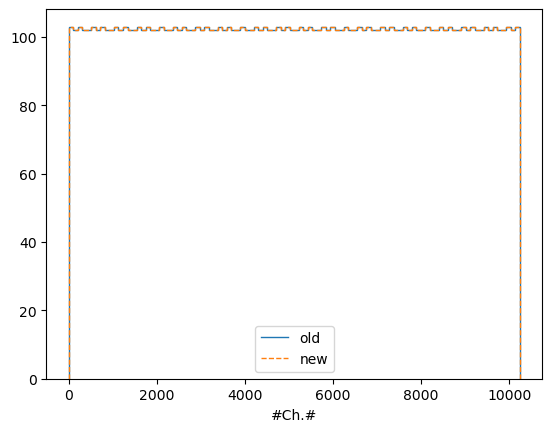

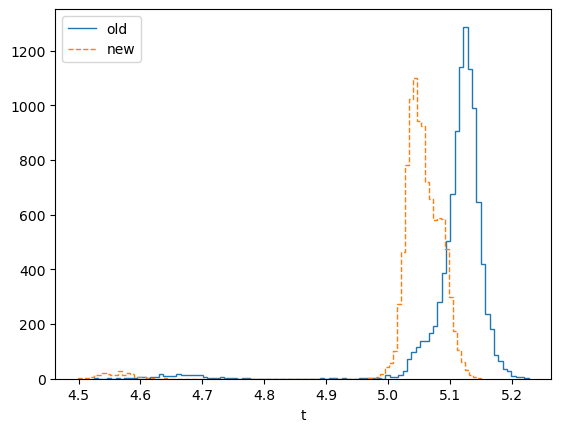

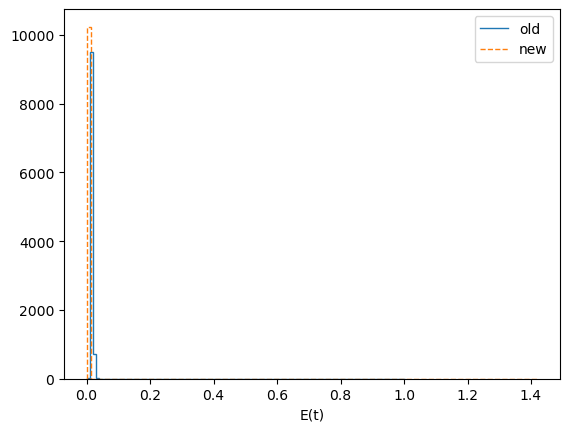

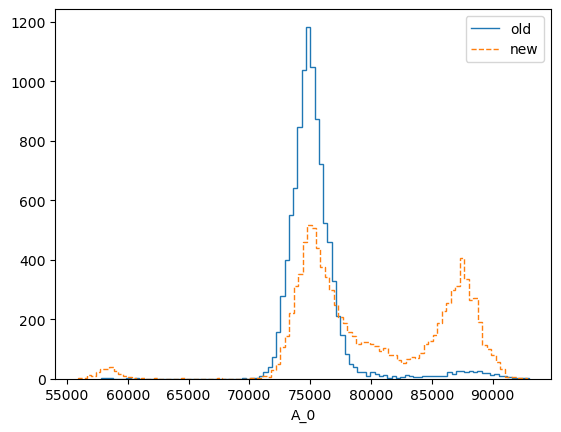

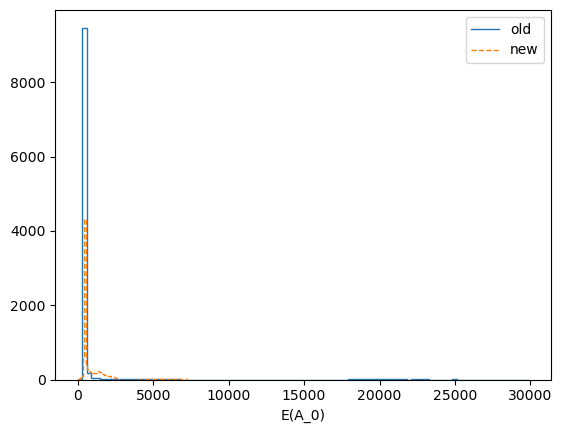

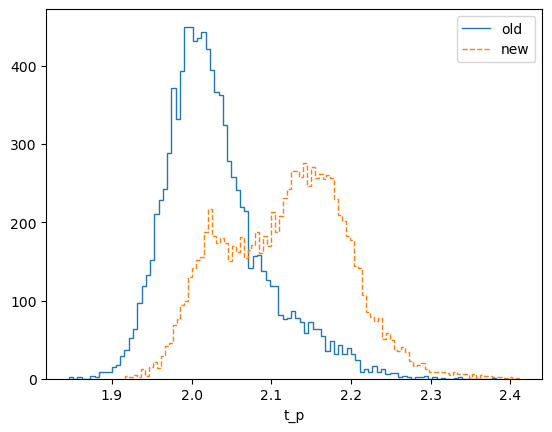

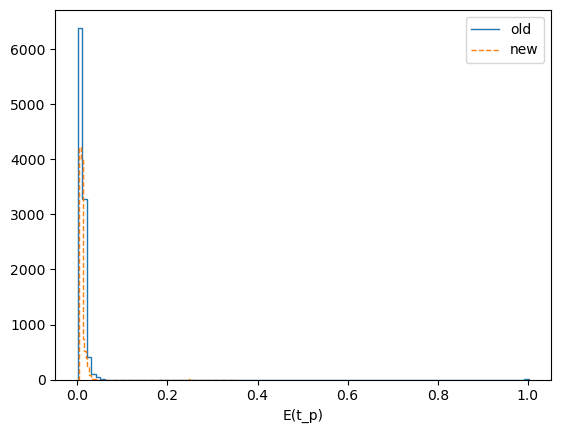

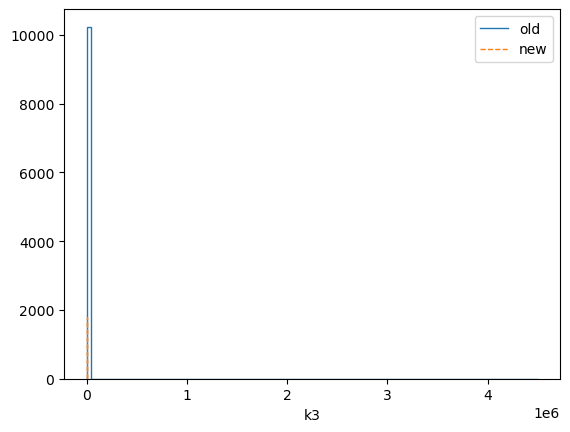

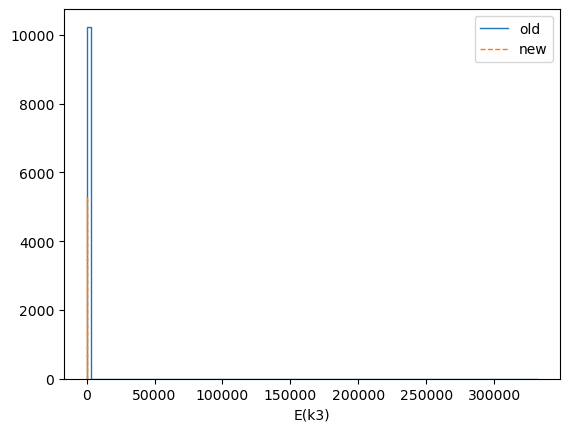

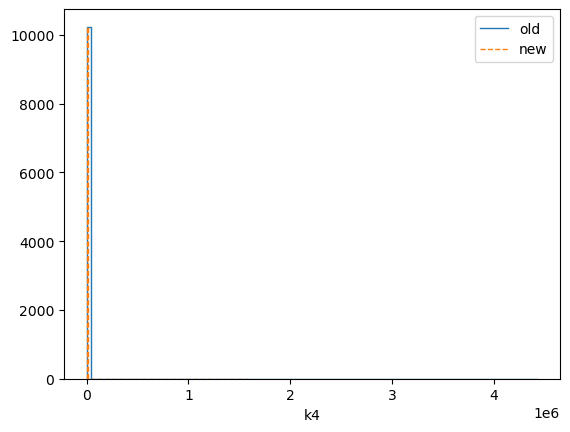

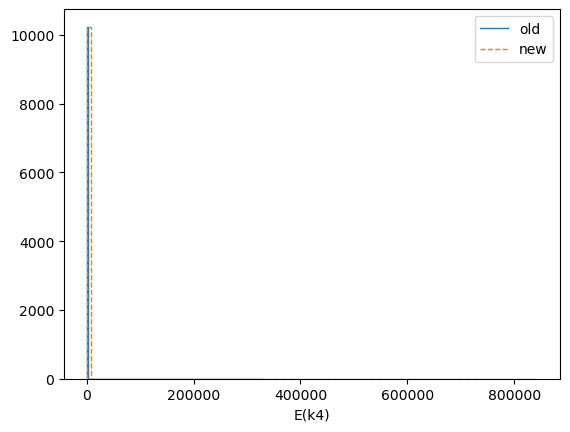

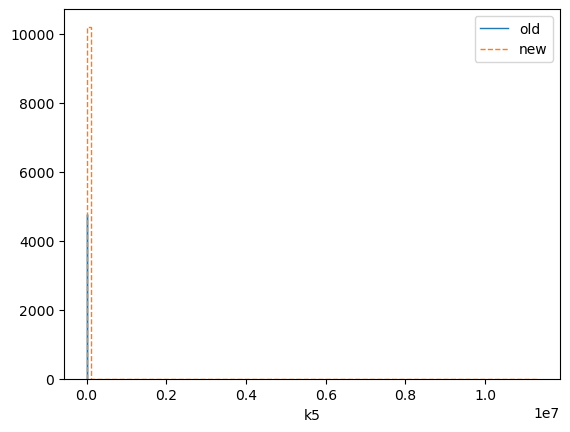

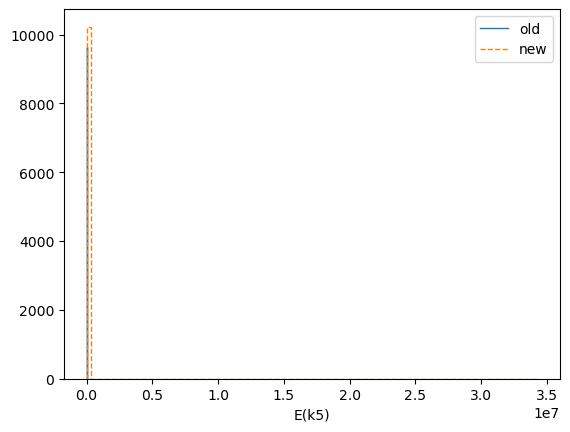

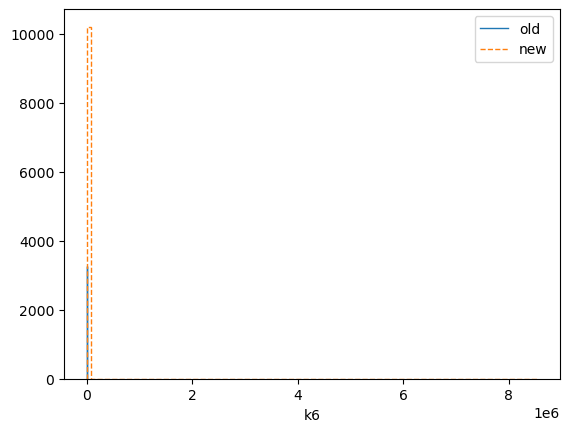

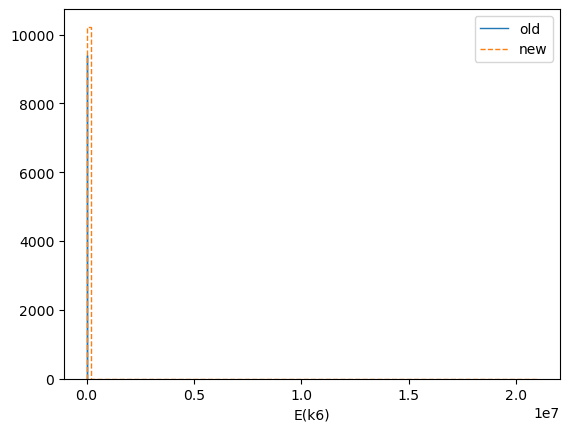

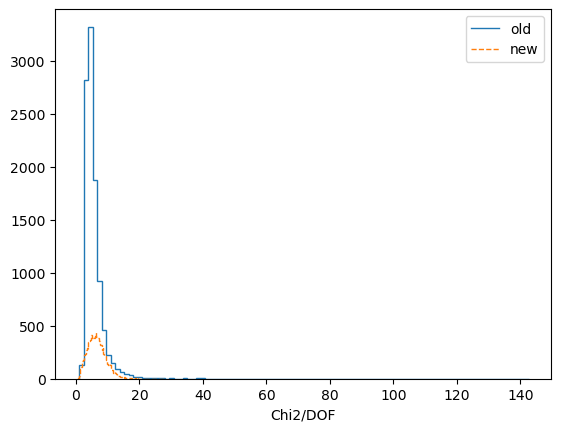

In [38]:
for k_param in data_old.columns:
    k_old = data_old[np.abs(data_old[k_param])!=np.inf][k_param]
    k_new = data_new[np.abs(data_new[k_param])!=np.inf][k_param]
    c_old, b_old = np.histogram(k_old, bins=100)
    c_new, b_new = np.histogram(k_new, bins=100)
    plt.figure()
    plt.stairs(c_old, b_old, label='old', ls='-')
    plt.stairs(c_new, b_new, label='new', ls='--')
    plt.xlabel(k_param)
    plt.legend()
    plt.show()

**The difference between the new and old fit parameters are on the peak time, time offset, and amplitude.**
I think there are some error in the fit parameters in the new data:
* the time offset t has a value close to 0 but with a large error close to 80000
* the amplitude A_0 has a value close to 0 (shouldn't be the case if there's something in the waveform)
* the time peak is close to 0 with an error larger than the mean value (shouldn't be the case if the data are from LArASIC, the smallest peak time of the LArASIC is 0.5us while the average value here is smaller than 0.5us).
* the parameter k6 has a small value (close to 0) but with large error (E(k6) = ~5.5 on average).<br/>
##### The other parameters are OK.
##### ==> Continue with the old data for now. Ask for clarification or verification about these.
## This problem is solved:
* The two data are equal. The issue was when reading the text file as a dataframe. The data columns were shifted to the left making the Ch# to become the indices while the columns name stayed at their places. That made the chi2/dof to take all NaN values.